In [1]:
import numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Logistic Regression (Colin Fingerlin)

## 3 Ways to Derive Optimal Linear Regressors

Let there be a dataset $\mathcal{D} = \{ (\mathbf{x}_i, y_i) \}_{i = 1}^n$ and a loss function as follows.

$$
    \sum_{i=1}^{n}(y_i - \tilde{\mathbf{x}}_i^T\mathbf{w})^2 = ||\mathbf{y}-\mathbf{X}\mathbf{w}||^2
$$

We have seen that there are multiple ways to obtain the optimal weights for linear regression in the previous chapter
*Perspectives on Linear Regression*, so let us go over them again in a quick recap.

### Algebra

First, we already found weights by finding the first order derivative and setting the expression to zero.
In our example we would thus solve the following equation.

$$
    \nabla_{\mathbf{w}}||\mathbf{y}-\mathbf{X}\mathbf{w}||^2
$$
$$
    -2\mathbf{X}^T(\mathbf{y}-\mathbf{X}\mathbf{w})
$$
$$
    -2(\mathbf{X}^T\mathbf{y}-\mathbf{X}^T\mathbf{X}\mathbf{w}^*)=0
$$
$$
    \mathbf{X}^T\mathbf{y}=\mathbf{X}^T\mathbf{X}\mathbf{w}^*
$$
$$
    \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}=\mathbf{w}^*
$$

### Geometry

From a geometric point of view we can derive the same solution. We do this by substituting $v = \mathbf{X}\mathbf{w}$ in
our original problem. The vector $v$ can then be expressed as some linear combination in the columnspace of $\mathbf{X}$. We
will define the columns of $\mathbf{X}$ as $\mathbf{X}=[x^{(1)},...,x^{(d)}]$.

$$
    \min\{||\mathbf{y}-\mathbf{X}\mathbf{w}||^2\ |\ \mathbf{w} \in \mathbb{R}^d\} = \min\{||\mathbf{y}-v||^2\ |\ v \in span\{x^{(1)},x^{(2)},...,x^{(d)}\}\}
$$

We saw that the shortest residual $\hat{y} - y$ for arbitrary dimensions is perpendicular to every column vector of $\mathbf{X}$.

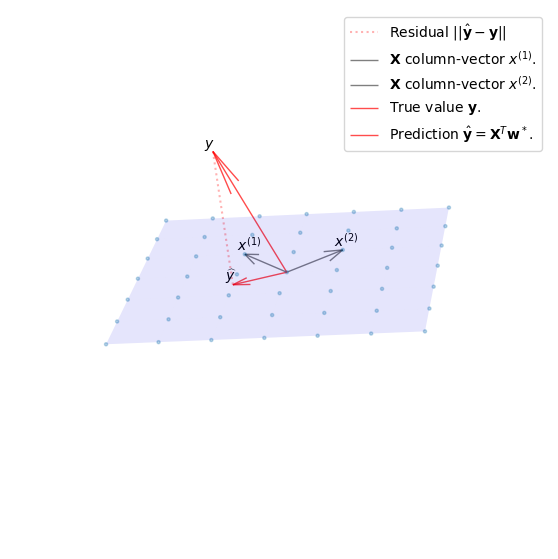

In [2]:
x1 = numpy.array([1, 1, 1])
x2 = numpy.array([1, -1, 1])
y = numpy.array([-3, 1, 2])

X = numpy.vstack((x1, x2)).T
w = numpy.linalg.solve(X.T @ X, X.T @ y)
y_hat = X @ w

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

xx, yy = numpy.meshgrid(range(-3, 4), range(-3, 4))
zz = xx

ax.plot_surface(xx, yy, zz, alpha=0.1, color="blue")
ax.scatter(xx, yy, zz, marker='.', alpha=0.3)
ax.grid(True)

ax.quiver(
        0, 0, 0,
        x1[0], x1[1], x1[2],
        color='k', alpha = .5, lw = 1,
        label="$\mathbf{X}$ column-vector $x^{(1)}$."
    )
ax.quiver(
        0, 0, 0,
        x2[0], x2[1], x2[2],
        color='k', alpha=.5, lw=1,
        label="$\mathbf{X}$ column-vector $x^{(2)}$."
    )
ax.quiver(
        0, 0, 0,
        y[0], y[1], y[2],
        color='red', alpha=.7, lw=1,
        label="True value $\mathbf{y}$."
    )
ax.quiver(
        0, 0, 0,
        y_hat[0], y_hat[1], y_hat[2],
        color='red', alpha=.7, lw=1,
        label="Prediction $\hat{\mathbf{y}}=\mathbf{X}^T\mathbf{w}^*$."
    )
ax.plot([y[0], y_hat[0]], [y[1], y_hat[1]], [y[2], y_hat[2]], ':r', alpha=0.3, label="Residual $||\hat{\mathbf{y}}-\mathbf{y}||$")
ax.text(*(x1 + 0.2), '$x^{(1)}$')
ax.text(*(x2 + 0.2), '$x^{(2)}$')
ax.text(*(y + 0.2), '$y$')
ax.text(*(y_hat + 0.2), '$\widehat{y}$')
ax.legend()
plt.axis('off')

ax.view_init(-18, -172)

plt.show()

This can also be expressed by their dot product resulting in 0.

$$
    (x^{(j)})^T(\mathbf{X}\mathbf{w}^*-\mathbf{y}) = 0\ \textit{for}\ j \in \{1, 2, ..., d+1\} 
$$

Expanding this to include all column vectors we find that $[x_1, x_2,...,x_{d+1}]^T = \mathbf{X}^T$ and can 
simplify the expression in the same exact way as we did in the algebraic approach.

$$
    \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}=\mathbf{w}^*
$$

### Probability

Finally, in a probabilistic approach to linear regression we assume that the response $\mathbf{y}$ is obtained by a linear combination
of our explanatory variables $x_1,...,x_n$. Additionally we model a constant noise or error $\epsilon$ which is usually assumed to be normally 
distributed. 

$$
    \mathbf{y} = \mathbf{w}^T\mathbf{X} + \epsilon \quad \textit{where} \quad \epsilon \sim \mathcal{N}(0, \sigma^2\mathbf{I})
$$

Adding a normally distributed random variable $\epsilon$ to the equation makes the results random as well, that is logical. The
only thing to find out is how they are distributed. No problem! The predictions are also normally distributed with variance $\sigma^2$ and mean $\mathbf{w}^T\mathbf{X}$, since for a constant $c$ and 
normal distribution $F_X$ we have:

$$
    F_{X + c}(x) = p(X + c \leq x) = p(X \leq x - c) = \int_{-\infty}^{x-c}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{(t-\mu)^2}{\sigma}\right)}dt
$$
$$
    \quad = \int_{-\infty}^{x}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{(s-(c+\mu))^2}{\sigma}\right)}ds
$$

And therefore $c + \mathcal{N}(\mu, \sigma^2) = \mathcal{N}(\mu + c, \sigma^2)$. Or in other words, the mean of the distribution is shifted by
adding a constant $c$.
The probability of a response $\mathbf{y}$ given variables $\mathbf{x}$ and parameters $\theta$ can then be writen as follows:

$$
    p(\mathbf{y} | \mathbf{x}; \theta) = \mathcal{N}(\mathbf{y}|\mathbf{w}^T\mathbf{x}, \sigma^2)\quad\textit{where}\quad \theta = (\mathbf{w}, \sigma)
$$

We then find our optimal parameters $\theta^*$ by maximizing the likelihood $p(\mathcal{D};\theta)$ of observing our training set $\mathcal{D}$ and our parameters $\theta$.
If the events $(y_i, x_i)$ are assumed to be $iid.$ their joint probability is a product.

$$
    \hat{\theta} = arg\max_\theta p(\mathcal{D};\theta) = arg\max_\theta \prod_{i=1}^{n}p(y_i|x_i;\theta)
$$

Then we can maximize the log-likelihood, which is a function of our parameters $\theta$.

$$
    \ell(\theta) := \log p(\mathcal{D}; \theta) = \sum_{i = 1}^n \log p(y_i | \mathbf{x}_i ; \theta)
$$

## Linear Regression & Classification Problems

### Passing Exams

Imagine we have a simple binary classification problem with labels $\{-1, 1\}$, for
example, let their be data about the outcome of students exams, which are either passed
or failed. For each student we have a record of how much hours they have put into studying.

We will first try to model this example with *simple linear regression*. 

What follows are two linear regressions. In the first one, we will fit our
model to some fictitious data. Second, we will repeat it with some
additional outlier datapoints, showcasing a number of students who put a lot
of work in, to illustrate an arising issue.

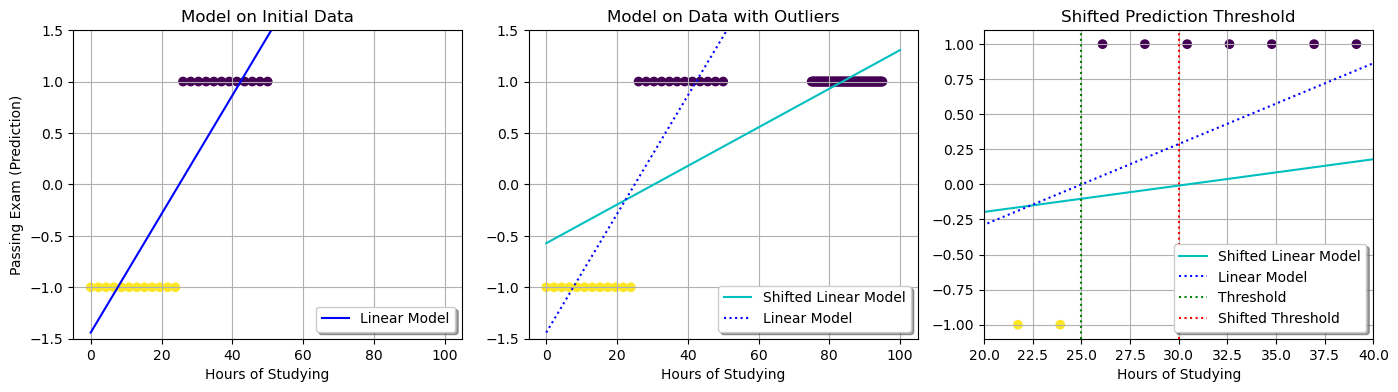

In [3]:
# Some student data, where the integer refers to the hours of
# studying and the sign proclaims whether the student passed the exam.
x1 = numpy.array(numpy.linspace(-25, 25, 24)).reshape(-1, 1)

# Here we add some additional data of students who - studied a lot.
x2 = numpy.concatenate([numpy.linspace(-25, 25, 24), numpy.linspace(50, 70, 100)]).reshape(-1, 1)

y1, y2 = numpy.sign(x1), numpy.sign(x2)  # Get the labels. {-1, 1}
x1, x2 = numpy.add(x1, 25), numpy.add(x2, 25)

# Fit the regression models for both x1, x2.
reg1 = LinearRegression().fit(x1, y1)
reg2 = LinearRegression().fit(x2, y2)

fig, axs = plt.subplots(1, 3, figsize=(14, 4))

# Scatter the initial datapoints.
scatter1 = axs[0].scatter(x1, y1, c=-y1)
scatter2 = axs[1].scatter(x2, y2, c=-y2)
scatter3 = axs[2].scatter(x2, y2, c=-y2)

# -------------------- Plot the Predictions ------------------
x_grid = numpy.linspace(0, 100, 20).reshape(-1, 1)
x_grid2 = numpy.linspace(0, 100, 20).reshape(-1, 1)

line1, = axs[0].plot(x_grid, reg1.predict(x_grid), 'b')
line2, = axs[1].plot(x_grid, reg2.predict(x_grid), 'c')
line2b, = axs[1].plot(x_grid, reg1.predict(x_grid), ':b')

line3, = axs[2].plot(x_grid, reg2.predict(x_grid), 'c')
line3b, = axs[2].plot(x_grid, reg1.predict(x_grid), ':b')

y_shift = numpy.linspace(-1.1, 1.1, 3)
thr1, = axs[2].plot(numpy.array([25] * len(y_shift)), y_shift, ':g')
thr2, = axs[2].plot(numpy.array([30] * len(y_shift)), y_shift, ':r')

axs[0].grid(True)
axs[0].set_title("Model on Initial Data")
axs[1].grid(True)
axs[1].set_title("Model on Data with Outliers")
axs[2].grid(True)
axs[2].set_title("Shifted Prediction Threshold")

# Add Legend & Labels
axs[0].legend((line1,), ('Linear Model',), loc='lower right', shadow=True)
axs[1].legend((line2, line2b,), ('Shifted Linear Model', 'Linear Model',), loc='lower right', shadow=True)
axs[2].legend((line3, line3b, thr1, thr2,), ('Shifted Linear Model', 'Linear Model', 'Threshold', 'Shifted Threshold',),
              loc='lower right', shadow=True)
axs[0].set_xlabel('Hours of Studying')
axs[0].set_ylabel('Passing Exam (Prediction)')
axs[1].set_xlabel('Hours of Studying')
axs[2].set_xlabel('Hours of Studying')

plt.setp(axs, ylim=(-1.5, 1.5))

axs[2].set_xlim(20, 40)
axs[2].set_ylim(-1.1, 1.1)

fig.tight_layout(pad=1.0);

### Shifting Prediction Threshold 

If we add datapoints, our predictions shift. Our threshold value for classifying
an amount of studying as passing ($x \quad \textit{where} \quad y = 0$) shifts as well, which it should not in this case, as we will make more errors
as to predictions for the non-outlier students. This can be seen in the third plot in the previous figure. The shifted 
threshold causes us two more misclassified datapoints than the original threshold.

Suffice it to say, this model is **highly affected by outliers** and not suited for the task of classification for these events.

### Inadequate Loss-Function

Secondly, a simple sanity check lets us see, that the prediction for a student passing the exam who studies exceedingly long hours is greater than 1 in this model, which
is absurd, if taken as a probability. Vice versa this model also allows for negative predictions, which are equally non-tenable for us.

*Why is it not stable?* We intend a regression which gives us a probability for data to classify as either label 
$\{-1, 1\}$. But our linear regression outputs values in the real numbers $\mathbb{R}$.

Previously, the quality of our classification models has been measured with the $ l_{01} $ loss function, which, 
given the true label $y$ and our prediction $\hat{y}$, simply maps an accurate classification to 0, and an inaccurate classification to 1.

$$
l_{01}(y, \hat{y}) = \textbf{1}(y = \hat{y}) = 1 - y\hat{y} \quad \textit{where} \quad \hat{y} \in \{-1, 1\}
$$

Let us observe the difference between the $l_{01}$ loss function and the
squared loss $l_2$ on real values, given we always predict the same label $1$.

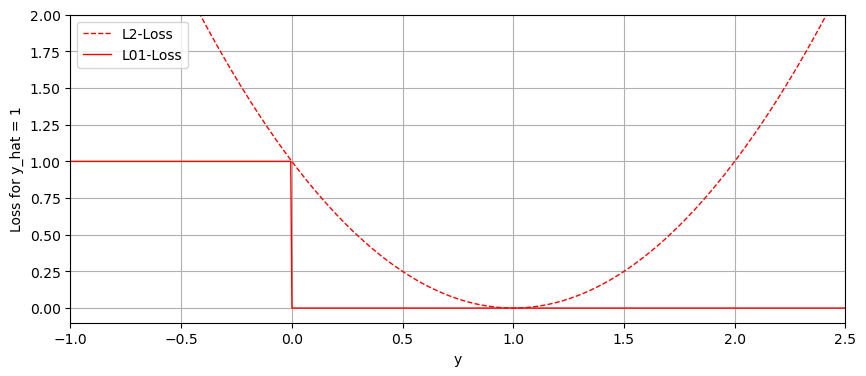

In [4]:
# L2-Loss Function
loss_l2 = lambda y, y_hat: (y - y_hat)**2
# L01-Loss Function
loss_01 = lambda y, y_hat: (1 - numpy.sign(y)*y_hat)/2

y = numpy.linspace(-3, 2.5, 1000)
y_hat = 1  # Always predict 1.

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
line1 = ax.plot(y, loss_l2(y, y_hat), '--r', lw=1, label='L2-Loss')
line2 = ax.plot(y, loss_01(y, y_hat), '-r', lw=1, label='L01-Loss')
ax.legend(('L2-Loss', 'L01-Loss'))
plt.setp(ax, xlabel='y', ylabel='Loss for y_hat = 1', ylim=(-0.1, 2.0), xlim=(-1, 2.5))
ax.grid(True);

In the previous plot, one can see that the $l_{2}, l_{01}$ loss functions do not align, particularly
where the values are exceedingly positive. Using the Least Squares Method does not make
much sense in a setting with discrete classes.

## Normalizing our Data

With the One-Hot-Encoding technique we already saw how we can prepare data such that a classifier achieves
better accuracy. Nonetheless, linear least squares regression did not give us suitable probabilities in $[0, 1]$.
Let us again have a look at the results.

In [5]:
import mlxtend
from mlxtend.data import loadlocal_mnist

X_train, y_train = loadlocal_mnist(
        images_path='./book_data/train-images-idx3-ubyte', 
        labels_path='./book_data/train-labels-idx1-ubyte'
        )

d = 28**2
n = 50000

# sample n digits from the big training set
shuffle_idx = numpy.random.choice(X_train.shape[0], n)
X_train = X_train[shuffle_idx]
y_train = y_train[shuffle_idx]

# remove pixels that are always zero
nz_mask = numpy.any(X_train > 0, axis=0)
X_mask = X_train[:, nz_mask] / 255.0
d_mask = nz_mask.sum()

X_b = numpy.hstack((numpy.ones((n, 1)), X_mask))

lam = 0.1
y_onehot = numpy.zeros((n, 10))
for i in range(n):
    y_onehot[i, int(y_train[i])] = 1

W_mask = numpy.linalg.inv(X_b.T @ X_b + lam * numpy.eye(d_mask + 1)) @ X_b.T @ y_onehot

with numpy.printoptions(formatter={'float': '{: 0.3f}'.format}):
    print((X_b @ W_mask)[5])
    print(y_onehot[5])
    print(numpy.max(X_b @ W_mask))

[ 0.002 -0.058  0.045  0.063  0.176  0.089  0.011  0.072 -0.015  0.616]
[ 0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000]
1.6353114699265887


Given our data $x$ and corresponding weights $w_c$, we want to normalize our prediction $w^T_cx$ with a function $f: \mathbb{R} \rightarrow [0, 1]$.

### Logistics Function

There are many normalization functions that can be chosen, with the criteria being among others differentiability, if our models apply gradients for optimization, or 
expressivity, which characterizes the complexity of functions that can be computed by our model. Let's have a look at the standard logistics function, which is the sigmoid function $S$:

$$
    S(y) = \frac{1}{1 + e^{-y}}
$$

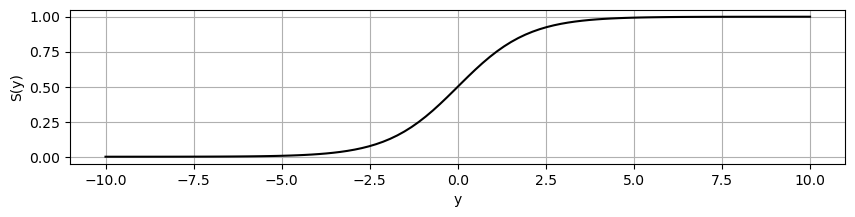

In [6]:
L = 1  # Supremum
x0 = 0  # Midpoint of Sigmoid Curve.
k = 1  # Steepness
S = lambda x: L/(1 + numpy.exp(-k*(x - x0)))

x = numpy.linspace(-10, 10, 100)

fig, ax = plt.subplots(1, 1, figsize=(10, 2))

line = ax.plot(x, S(x), '-k')

plt.setp(ax, xlabel='y', ylabel='S(y)')       
ax.grid(True);

### Softmax

In the case where we want to handle multiple classes $c \in \{c_1,...,c_C\}$ we use a generalization of the logistics function for
higher dimensions called $softmax$.

$$
    softmax(y)_i = \frac{e^{y_i}}{\sum_{c'=1}^{C}e^{y_{c'}}} \quad \textit{where} \quad y = [y_1,...,y_C]^T
$$

We can visualize the softmax function for 2 dimensions, and will see that its marginal distributions
do in fact resemble the sigmoid function!

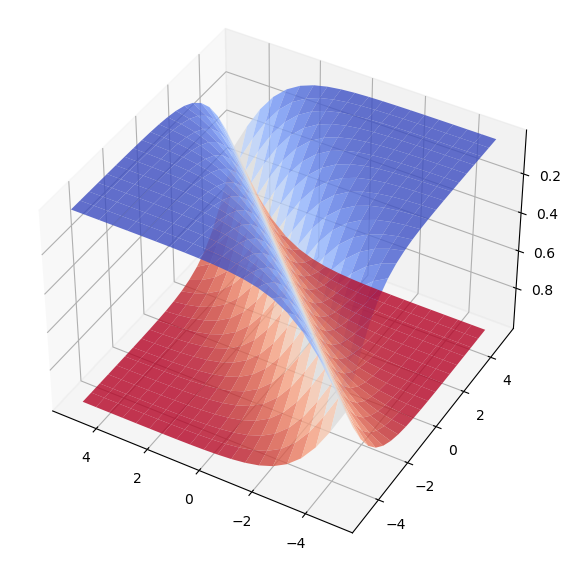

In [7]:
from matplotlib import cm

softmax = lambda x: numpy.exp(x) / numpy.exp(x).sum(axis=2, keepdims=True)
x = y = numpy.linspace(-5, 5, 20)

XX, YY = numpy.meshgrid(x, y)

Z = softmax(numpy.dstack((XX, YY)))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7,7))

surf1 = ax.plot_surface(XX, YY, Z.T[0].T, cmap=cm.coolwarm, alpha=0.8)
surf2 = ax.plot_surface(XX, YY, Z.T[1].T, cmap=cm.coolwarm, alpha=0.8)

ax.view_init(-140, 60);

In both cases, the effect on the data is its projection to the probability range [0,1] and its normalization 
such that, in the case of the vectorized version with softmax, the values of an output vector sum up to 1. In the
previous graphic, each surface represents the probability of one of two classes at a given coordinate. The probability that either one or the other is our label should be their sum, given that they are independent, and 
here we can be sure that this is the case. Sadly we are troubled picturing higher dimensions, but rest assured the assumption
holds.

## Finding a Suitable Loss 

### Posterior Values

Now that we have normalized our prediction with the $softmax$-function we can use the posterior values to
derive a new loss function, which is more suitable than the least squares method.

Since we have modeled our predictions as well-defined probabilities we can ask ourselves,
given data $x$ and its corresponding class-weights $w_c$, what is the probability of a certain class $c$?
The answer *should* be our prediction.

$$
    p( y = c | x; \mathbf{w}) = \frac{e^{w^T_cx}}{\sum_{c=1}^{C}e^{w^T_cx}}
$$

### Preparing our Model for Training

Alas, the optimal weights will only be found by training our model! Given some dataset 
$\mathcal{D} = \{\ (x_i, y_i)\ |\ i \in \{1,...,k\}\}$, where our data is independent and identically 
distributed, we know from previous chapters that we **maximize the likelihood** of the data in order
to obtain the optimal parameters. In this case we utilize the log-likelihood function $\ell$, which is
the logarithm of the likelihood function $L$.

$$
    \ell(\mathbf{w}) = ln(L(x;\mathbf{w})) = ln\left(\prod_{i=1}^k p( y = y_i | x_i; \mathbf{w})\right) = \sum_{i=1}^k ln(p( y = y_i | x_i; \mathbf{w}))
$$

And if we substitute with our softmax function:

$$
    \sum_{i=1}^k ln(p( y = y_i | x_i; \mathbf{w})) = \sum_{i=1}^k ln\left(\frac{e^{w^T_{y_i}x}}{\sum_{c=1}^{C}e^{w^T_cx}}\right)
$$

If we double down on and work to simplify this expression we can establish a relationship to **cross-entropy**.

### Cross-Entropy

Think of two images, one is white noise and one is of a banana. Which of these pictures carries more information? You might think
the banana, since we recognize it, and it conjures up relations in our minds. White noise on the other hand is meaningless to us.

![alt](./images/white-noise.png) ![alt](./images/Banana-Single-2.jpg)

Say you want to send this data to a friend. Can you compress one more than the other? There is no way to relate any pixel value
to another in a random image, so you indeed have to send all the data if your friend should receive it without loss. The noise is
a state of maximum information or *maximum entropy*.

When we speak of the **cross-entropy** between two probability distributions over the same set of events we are talking about
the average number of information bits we need to classify one of the events. For example, if we have two probability distributions
$\gamma, \delta$ over the same set of events $\mathcal{X}$, the cross entropy $H$ is defined as:

$$
    H(\gamma, \delta) = - \sum_{x\in\mathcal{X}}\gamma(x)\ln(\delta(x))
$$

Let us visualize this for two normal distributions $\gamma(x)\sim\mathcal{N}(s, 1)$ and $\delta(x)\sim\mathcal{N}(0, 1)$. We
will shift the mean $s$ of $\gamma(x)$ and calculate the cross entropy along the way!

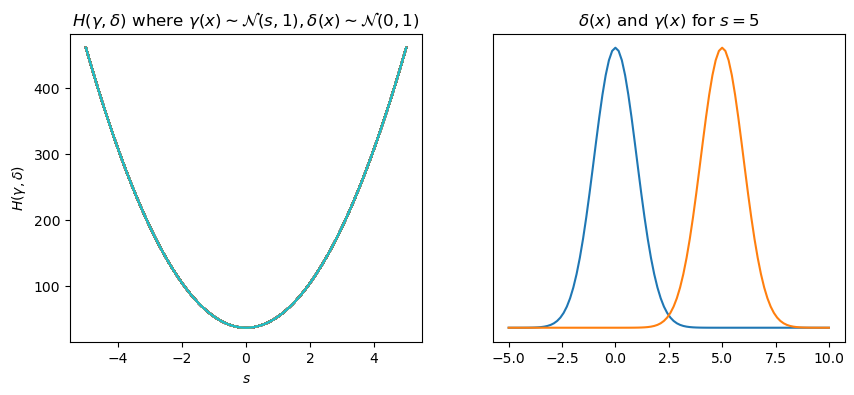

In [8]:
from scipy.stats import norm
   
def cross_entropy(x, s):
    y = numpy.zeros(len(x))
    for idx, means in enumerate(s):
        y[idx] = numpy.sum(numpy.multiply(norm.pdf(x),numpy.log(norm.pdf(x - means))))
    return -y
    
n = 100

xs = numpy.linspace(-1, 1, n)
ss = numpy.array([numpy.linspace(-5, 5, n)]*n).T
ys = cross_entropy(xs, ss)

fig, axs = plt.subplots(1, 2, figsize=(10,4))
    
axs[0].plot(ss, ys)
axs[0].set_title("$H(\gamma,\delta)$ where $\gamma(x)\sim\mathcal{N}(s, 1),\delta(x)\sim\mathcal{N}(0, 1)$")
axs[0].set_ylabel("$H(\gamma,\delta)$")
axs[0].set_xlabel("$s$")

xs = numpy.linspace(-5, 10, n)
ys1 = norm.pdf(xs)
ys2 = norm.pdf(xs - numpy.array([5]*n)) 

axs[1].plot(xs, ys1, label="$\delta(x)$")
axs[1].plot(xs, ys2, label="$\gamma(x)$")
axs[1].set_title("$\delta(x)$ and $\gamma(x)$ for $s=5$")
axs[1].yaxis.set_visible(False)

plt.show()

Generally, the lower the cross-entropy in our datasets, the better our
model performs. 

**Now**, let us get back to the equation and also define some more notation to simplify it! We will use a mathematical slight-of-hand.

$$
    \frac{e^{w^T_{y_i}x}}{\sum_{c=1}^{C}e^{w^T_cx}} = \prod_{c=1}^C \mu^{y_{ic}}_{ic}
$$

...where $\mu_{ic} = [softmax(w^T_1x_i,..., w^T_Cx_i)]_c$ and $y_{ic} = \textbf{1}(y_i = c)$. The right hand
side of this simplification [can be read](https://en.wikipedia.org/wiki/Cross_entropy#Relation_to_maximum_likelihood) as the product of the estimated probabilities for classes $c$ to the
power of their occurrences in the predictions, which is to say their actual probability. And if we substitute these definitions in the previous equations a seemingly familiar equation....
    
$$                                                              
    \sum_{i=1}^k ln\left(\prod_{c=1}^C \mu^{y_{ic}}_{ic}\right) = \sum_{i=1}^k \sum_{c=1}^C ln(\mu^{y_{ic}}_{ic}) = \sum_{i=1}^k \sum_{c=1}^C y_{ic} ln(\mu_{ic})
$$

The term $\sum_{c=1}^C y_{ic} ln(\mu_{ic})$ looks suspiciously similar to **cross-entropy**! This means that
maximizing the likelihood $\ell(w)$ is equivalent to minimizing the cross-entropy, or to spare the headache *minimizing the negative loss-likelihood.* 
Why is that the case? We are essentially comparing two probability distributions. On the one hand we have the actual distribution of our data, and on
the other hand we have the distribution of our prediction. When we are maximizing the likelihood of our prediction, we are trying to eliminate the 
cross entropy between the two. *In not so many words*, we are trying to make our predicted distribution be like the true distribution.

Additionally, for each $(x_i, y_i) \in \mathcal{D}$, the variables $(y_{i1},...,y_{iC})$ and $(\mu_{i1},...,\mu_{iC})$ are well defined probability
distributions over the C classes. We will continue to use this notation in this chapter. **To summarize**, the log-likelihood function to maximize in order to find the optimal parameters $\mathbf{w}$ can be writen as:

$$
    \ell(\mathbf{w}) = \sum_{i=1}^k \sum_{c=1}^C y_{ic} ln(\mu_{ic})                        
$$

In our case, since it makes more sense colloquially to minimize an error, we will minimize the negative version of it. Which is
minimizing the distance between the predicted and actual probability distributions of the data.

## Binary Classification with NNL

### Negative Log-Likelihood Loss

Let us consider now an example for binary classification, which could be again our students actualized ECTS and a model
to predict their success in exams, letting our classes be $c \in \{-1, 1\}$. We will consider the negative loss-likelihood:

$$
    NNL(\mathbf{w}) = -\sum_{i=1}^k \sum_{c=1}^C y_{ic} ln(\mu_{ic})  
$$

For our two classes, we know $p(y_i = -1) = 1 - p(y_i = 1)$ and this simplifies to:

$$
    NNL(\mathbf{w}) = -\sum_{i=1}^k \left(y_{i1} ln(\mu_{i1}) + y_{i2} ln(\mu_{i2})\right) =  -\sum_{i=1}^k \left( y_i ln(\mu_i) + (1-y_i) ln(1-\mu_i)\right)
$$

As we explored previously, another way of picturing this equation is measuring the cross-entropy between two probability distributions
$(y_i, (1-y_i))$ and $(\mu_i, (1-\mu_i))$, as in how close the distribution of the predictions is to
the actual distribution of the data. If we examine $\mu_i$ and $(1 - \mu_i)$ we find that they simplify considerably:

$$
    \mu_i = \frac{e^{w^T_{c_1}x}}{\sum_{c=1}^{2}e^{w^T_cx}} = \frac{e^{w^T_{c_1}x}}{e^{w^T_{c_1}x}+e^{w^T_{c_2}x}} = \frac{e^{w^T_{c_1}x}}{e^{w^T_{c_1}x}+e^{w^T_{c_2}x}} * \left(\frac{e^{-w^T_{c_1}x}}{e^{-w^T_{c_1}x}}\right)
$$
$$
    = \frac{1}{1 + e^{(w_{c_2} - w_{c_1})^Tx}} = \frac{1}{1 + e^{w^Tx}}
$$
$$
    (1-\mu_i) = 1 - \frac{1}{1 + e^{w^Tx}} = \frac{1 + e^{w^Tx} - 1}{1 + e^{w^Tx}} * \left(\frac{e^{-w^Tx}}{e^{-w^Tx}}\right) = \frac{1}{e^{-w^Tx} + 1}
$$

Note that this is exactly the sigmoid function $S(x) = \frac{1}{1+e^{-x}}$ which we have seen earlier.
Substituting this in $NLL(W)$ as well as considering simple logarithm rules $log(\frac{a}{b}) = log(a) - log(b)$ and $log(1) = 0$ we get:

$$
    NLL(\mathbf{w}) = -\sum_{i=1}^k \left(y_i ln\left(\frac{1}{1 + e^{w^Tx_i}}\right) + (1-y_i) ln\left(\frac{1}{1 + e^{-w^Tx_i}}\right)\right)
$$

If we further focus the function for binary cases $y_i \in \{-1, 1\}$, then we can, you are getting the hang of this, *simplify*. 
First let us consider it with labels $y'_i \in \{0, 1\}$ then for $y'_i = 0$ we have:

$$
    = -\sum_{i = 1, y'_{i} = 0}^k ln\left(\frac{1}{1 + e^{w^Tx_i}}\right)  = \sum_{i = 1, y'_{i} = 0}^k ln\left(1 + e^{w^Tx_i}\right)
$$

For the case $y'_i = 1$ on the other hand we get:

$$
    = -\sum_{i = 1, y'_{i} = 1}^k ln\left(\frac{1}{1 + e^{-w^Tx_i}}\right)  = \sum_{i = 1, y'_{i} = 1}^k ln\left(1 + e^{-w^Tx_i}\right)
$$

Now, back with our original labels $y_i \in \{-1, 1\}$, we can elegantly model the same results for either binary class in one single equation. Neat!

$$
    NLL(\mathbf{w}) = \sum_{i=1}^k ln(1 + e^{-y_iw^Tx_i}) \quad y_i \in \{-1, 1\}
$$

### Comparison with LSE

We can inspect the limits of this loss, to see why it is much more in line with our previous $l_{01}$ loss. If our
prediction is exceedingly positive but the true outcome is negative, the loss rises indefinitely. If on the other 
hand the true outcome is positive the loss function goes to zero.

$$
    \lim_{\hat{y} \rightarrow +\infty} ln(1 + e^{-y\hat{y}}) = \begin{cases} +\infty &\quad y = -1 \\ 0 &\quad y = 1 \end{cases}
$$

The same applies to the other direction, the loss goes to zero if the prediction matches the outcome, otherwise it grows to infinity.

$$
    \lim_{\hat{y} \rightarrow -\infty} ln(1 + e^{-y\hat{y}}) = \begin{cases} 0 &\quad y = -1 \\ +\infty &\quad y = 1 \end{cases}
$$

We derived this loss to get rid of the least squares loss, which we
[deemed inadequate for classification problems](#inadequate-loss-function). 
Let us quickly have a look at the least squares loss for comparison:

$$                                                                   
    NLL_{\mathcal{l}2}(\mathbf{w}) = \frac{1}{n}\sum_{i=1}^k (1 - y_i\hat{y}_i)^2 = \frac{1}{n}\sum_{i=1}^k (1 - y_iw^Tx_i)^2
$$

We can plot all three losses, again with our prediction always being $1$ to illustrate the difference.

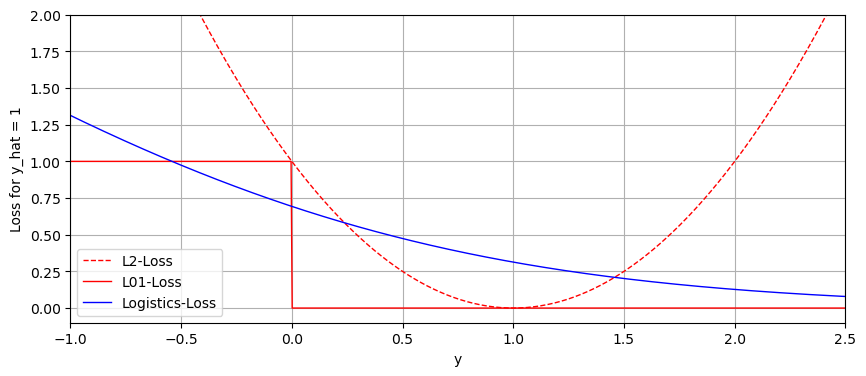

In [9]:
# Squared Error
loss_l2 = lambda y, y_hat: (y - y_hat)**2
# L01 Error
loss_01 = lambda y, y_hat: (1 - numpy.sign(y)*y_hat)/2
# Logistics-Loss
loss = lambda y, y_hat: numpy.log(1 + numpy.exp(-y*y_hat))

y = numpy.linspace(-1.5, 3.5, 1000)
y_hat = 1  # Always predict 1.

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
line1 = ax.plot(y, loss_l2(y, y_hat), '--r', lw=1, label='L2-Loss')
line2 = ax.plot(y, loss_01(y, y_hat), '-r', lw=1, label='L01-Loss')
line3 = ax.plot(y, loss(y, y_hat), '-b', lw=1, label='LL-Loss')
ax.legend(('L2-Loss', 'L01-Loss', 'Logistics-Loss'))
plt.setp(ax, xlabel='y', ylabel='Loss for y_hat = 1', ylim=(-0.1, 2.0), xlim=(-1, 2.5))
ax.grid(True)

As you can see, and as we previously explored mathematically, the logistic loss approaches
0 in the direction of an accurate prediction, while the $l_2$ loss grows to infinity either way.
It is clear that the logistic loss is a far better modelling of the $l_{01}$ loss than $l_2$. 

## Finding the Optimal Parameters

### No Closed Form Expression for Logistic Regression

We now have an adequate regression with a suitable loss function, so we *should* be able to set
the partial derivatives to zero and obtain our optimal weights $\mathbf{w}$.

$$
    \nabla_{\mathbf{w}}NLL(\mathbf{w}) = \nabla_{\mathbf{w}}\sum_{i = 1}^{n}(\mu_i-y_i)x_i = \nabla_{\mathbf{w}}\mathbf{X}^T\left(\left(\frac{e^{w^T_cx}}{\sum_{c=1}^{C}e^{w^T_cx}}\right)-y\right)
$$

Now there are some good news and bad news. The good news is, we won't have to calculate this derivative and set it to
zero in order to find the optimal weights. The bad news is, that we can not do so and have to find another way. Since the weights are tugged away in the exponents, here, we will not 
find a closed form expression for logistic regression like we did when deriving the linear least squares loss.

### Gradient (Steepest) Descend

Using gradient descend we can approximate local minima or maxima of functions in any number of dimensions. We iteratively
approach the extrema by moving along the direction of the gradient of a function. You know the derivative of a function gives us
a value corresponding to its slope at every point in space. In gradient descend, we find the **direction**, you 
guessed it, of the **descent** and move a distance with a scalar $\eta$, the **step size**.
If we start with some initial guess $w_0$ and repeat this process a certain number of times $t_{max}$, where we end up must be close
to a **local minimum**. We can formulate this in an algorithm as follows:

$\textit{for} \quad t \in \{1, ..., t_{max}\} \quad \textit{do}:$

$\quad\quad\quad\quad\mathbf{g}{(t)} = \nabla_{\mathbf{w}} \mathrm{NLL}(\mathbf{w}_{(t)}) \quad\quad\quad\quad\quad \text{(1) Compute the gradient.}$ 

$\quad\quad\quad\quad\mathbf{g}{(t)}$: $\mathbf{w}{(t+1)} \gets \mathbf{w}{(t)} - \eta \mathbf{g}{(t)} \quad\ \ \text{(2) Update the weights}$

Note the negative sign in (2), where we are stepping in the opposite direction of the gradient, or in other words, we are descending on the
slope towards a local minimum. You can picture the computed vector $g(t)$ at a point $\nabla_{\mathbf{w}}\mathrm{NLL}(w_{(t)})$ to be the 
direction the weights will be updated. The difference between gradient descend in general and **gradient steepest descend** is that in the latter
the step size $\eta_t$ is chosen in the iterations such that the value of the objective function, in this case $\mathrm{NLL}$, is minimized at $\mathbf{w}{(t+1)}$.

$$
    \eta_t = arg\min_{\eta} \left( \mathrm{NLL}(\mathbf{w}{(t)} - \eta \mathbf{g}{(t)}) \right)
$$

### Steepest Gradient Descend on the Aoki Function

We will use the Aoki Function as a surface to visualize the algorithm.

$$
    F(x, y) = 0.5(x^2 - y)^2 + 0.5(x - 1)^2
$$

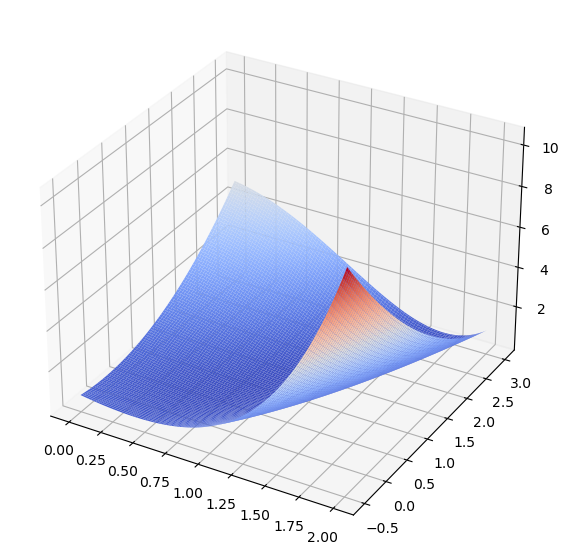

In [10]:
x_ = numpy.linspace(0, 2, 200)
y_ = numpy.linspace(-0.5, 3, 200)
xx, yy = numpy.meshgrid(x_, y_)
zz = 0.5*(xx**2 - yy)**2 + 0.5*(xx - 1)**2

fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, zz, cmap=cm.coolwarm,  rcount=100, ccount=100);

Our initial guess will be the $(x = 0, y = 0)$, our step size $\eta = 0.3$ and $t_{max} = 20$. The algorithm
will as such start in the lower-left corner of the previous illustration and iterate a total number of 20
steps.

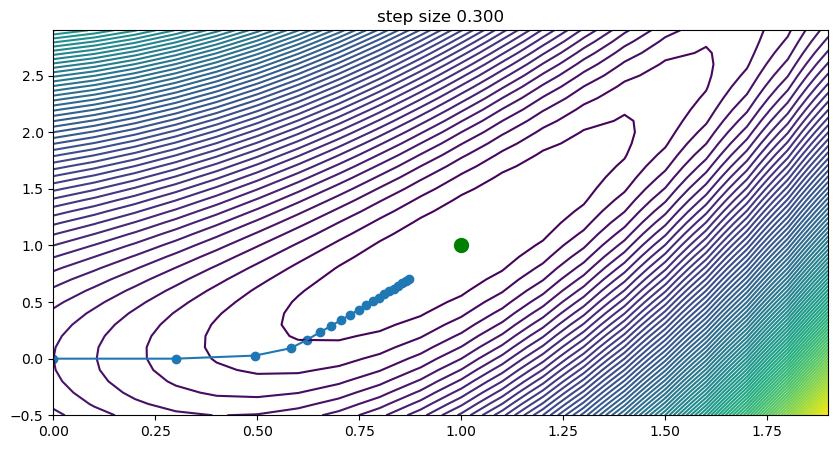

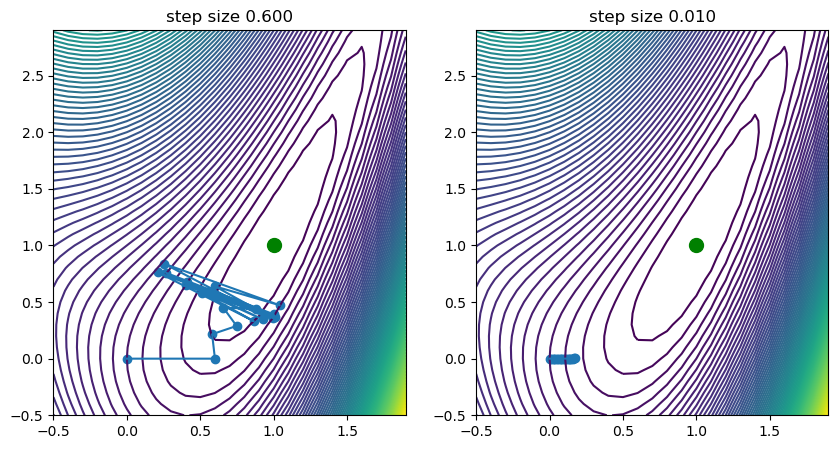

In [11]:
from scipy.optimize import minimize, line_search
import numpy as np
import time

step_sizes = [0.3]

def aoki_vectorized(x):
    """
    F(x,y) = 0.5 (x^2 - y)^2 + 0.5 (x-1)^2
    """
    f = 0.5 * np.square(np.square(x[:][0]) - x[:][1]) + 0.5 * np.square(x[:][0] - 1)
    return f


def aoki(x):
    """
    F(x,y) = 0.5 (x^2 - y)^2 + 0.5 (x-1)^2
    """
    f = 0.5 * np.square(np.square(x[0]) - x[1]) + 0.5 * np.square(x[0] - 1)
    return f


def aoki_gd(x):
    """
    First-Order derivative of aoki function(Nabia - 1)
    """
    g_x = 2 * np.dot((np.square(x[0]) - x[1]), x[0]) + x[0] - 1
    g_y = -1 * (np.square(x[0]) - x[1])
    return np.array((g_x, g_y))


def aoki_hess(x):
    """
    Second-Order derivative - Hessian Matrix of aoki function(Nabia - 2)
    """
    g_xx = 6 * np.square(x[0]) - 2 * x[1] + 1
    g_xy = -2 * x[0]
    g_yy = 1
    H = np.diag((2, 2))
    H[0][0] = g_xx
    H[0][1] = g_xy
    H[1][0] = g_xy
    H[1][1] = g_yy
    return H


def gradient_descent(x0, f, f_prime, hessian, stepsize=None):
    """
    Steepest-Descent algorithm with option for line search
    """
    x_i, y_i = x0
    all_x_i = list()
    all_y_i = list()
    all_f_i = list()

    for i in range(1, 100):
        all_x_i.append(x_i)
        all_y_i.append(y_i)
        all_f_i.append(f([x_i, y_i]))
        dx_i, dy_i = f_prime(np.asarray([x_i, y_i]))
        if stepsize is None:
            # Compute a step size using a line_search to satisfy the Wolf
            # conditions
            step = line_search(f, f_prime, np.r_[x_i, y_i], -np.r_[dx_i, dy_i], np.r_[dx_i, dy_i], c2=0.05)
            step = step[0]
            if step is None:
                step = 0
        else:
            step = stepsize
        x_i += -step * dx_i
        y_i += -step * dy_i
        if np.abs(all_f_i[-1]) < 1e-16:
            break
    return all_x_i, all_y_i, all_f_i


x1 = np.arange(0, 2, 0.1)
x2 = np.arange(-0.5, 3, 0.1)
x = np.meshgrid(x1, x2)
z = aoki_vectorized(np.array(x))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

nsteps = 20
for i, step in enumerate(step_sizes):
    plt.contour(x1, x2, z, 100)
    plt.plot(1, 1, "go", markersize=10)
    x0 = np.array((0.0, 0.0))
    if step == None:
        xs, ys, fs = gradient_descent(x0, aoki, aoki_gd, hessian=aoki_hess, stepsize=None)
        ttl = "exact line search"
        fname = "steepestDescentDemo_linesearch"
    else:
        xs, ys, fx = gradient_descent(x0, aoki, aoki_gd, hessian=aoki_hess, stepsize=step)
        ttl = "step size {:0.3f}".format(step)
        fname = "steepestDescentDemo_step{:d}".format(int(step * 10))
    ax.scatter(xs[:nsteps], ys[:nsteps])
    ax.plot(xs[:nsteps], ys[:nsteps])
    ax.set_title(ttl);
    
plt.show()

x1 = np.arange(-0.5, 2, 0.1)
x2 = np.arange(-0.5, 3, 0.1)
x = np.meshgrid(x1, x2)
z = aoki_vectorized(np.array(x))

fig2, axs = plt.subplots(1, 2, figsize=(10, 5))

step_size_high = 0.6
step_size_low = 0.01

for i, step in enumerate([step_size_high, step_size_low]):
    axs[i].contour(x1, x2, z, 100)
    axs[i].plot(1, 1, "go", markersize=10)
    x0 = np.array((0.0, 0.0))
    if step == None:
        xs, ys, fs = gradient_descent(x0, aoki, aoki_gd, hessian=aoki_hess, stepsize=None)
        ttl = "exact line search"
        fname = "steepestDescentDemo_linesearch"
    else:
        xs, ys, fx = gradient_descent(x0, aoki, aoki_gd, hessian=aoki_hess, stepsize=step)
        ttl = "step size {:0.3f}".format(step)
        fname = "steepestDescentDemo_step{:d}".format(int(step * 10))
    axs[i].scatter(xs[:nsteps], ys[:nsteps])
    axs[i].plot(xs[:nsteps], ys[:nsteps])
    axs[i].set_title(ttl);

plt.show()

### Step Size and Learning Rate

As stated, now visible, the weights will be updated iteratively to approach the local minimum in direction
of the steepest descend. If the gradient will be near zero in an area around the true minimum, we will approach
it more slowly. One can imagine the impact of this optimization on various surfaces and how initial guess, step size and the number
of iterations play into finding a close-to-optimal minimum.

If gradient descend is used as an optimization technique for a model, then the step size can be seen, among else, as its 
**learning rate**. If we set it too high, we might overshoot, oscillate or even diverge with our weights. If we set it
to low, we might need a *large* number of iterations to find it. This is visualized in the previous figure, where we can 
see that for step size $\eta=0.6$ we see oscillations occurring, while for a low step size of
$0.01$ we find that the progress towards the minimum is very slow indeed.

## Summary

We have seen that **linear regression** causes issues for classification problems and explained
why this is the case. For classification, the linear least squares approach is highly affected
by outliers, causing the prediction threshold to shift suboptimally. Furthermore, the loss
function that constitutes least-squares loss does not map well onto the $\ell_{01}$ loss. And finally, the resulting
prediction is *not* a well-defined probability distribution.

**Logistic regression** can fix this problem by transforming and normalizing our predictions with logistic
functions. For the higher dimensional case the $softmax$-function provides the sought after utility.
Our posterior values make up a well-defined probability distribution.

$$
    softmax(y)_i = \frac{e^{y_i}}{\sum_{c'=1}^{C}e^{y_{c'}}} \quad \textit{where} \quad y = [y_1,...,y_C]^T
$$
$$
    p( y = c | x; \mathbf{w}) = \frac{e^{w^T_cx}}{\sum_{c=1}^{C}e^{w^T_cx}}
$$

To derive a suitable loss we simplified the **log-likelihood** function of our equation and established 
a connection to cross-entropy. Maximizing the log-likelihood is equivalent to minimizing the negative 
log likelihood, which in turn is equivalent to minimizing **cross-entropy**.

$$
    NNL(\mathbf{w}) = -\sum_{i=1}^k \sum_{c=1}^C y_{ic} ln(\mu_{ic}) \quad \textit{where} \quad -\sum_{c=1}^C y_{ic} ln(\mu_{ic}) \quad \textit{is the cross-entropy.}                    
$$

We arrived at a suitable loss function that better describes the loss for classification problems in contrast
to least-squares loss. 

$$                                                                   
    NLL_{\mathcal{l}2}(\mathbf{w}) = \frac{1}{n}\sum_{i=1}^k (1 - y_iw^Tx_i)^2
$$

Finding the optimal parameters by taking the derivative is not possible since there does not exist a closed
form expression for our problem.

$$
\mathbf{X}^T(\nabla_{\mathbf{w}}\frac{e^{w^T_cx}}{\sum_{c=1}^{C}e^{w^T_cx}}) 
$$

Instead, we showed that we can use **gradient steepest descend** to iteratively approach an optimal solution. 
We also explained how the parameters of this optimization algorithm, such as the initial guess and **learning rate** $\eta$ govern
the speed and the accuracy of the model.

*In conclusion, if you come across classification problems in pattern recognition, you should definitely
use logistic regression!*